<a href="https://colab.research.google.com/github/Sumit-21107003/NDFC_loan_model/blob/main/ndfc_loan_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 1: Load the datasets
train_path = '/content/train_data.xlsx'
train_data = pd.read_excel(train_path)

test_path = '/content/test_data.xlsx'
test_data = pd.read_excel(test_path)

In [3]:
# Step 2: Data Exploration
print("Train Data Info:")
print(train_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 1

In [4]:
print("\nTrain Data Description:\n", train_data.describe())


Train Data Description:
         customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50

In [5]:
# Check for missing values
print("\nMissing Values:\n", train_data.isnull().sum())


Missing Values:
 customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


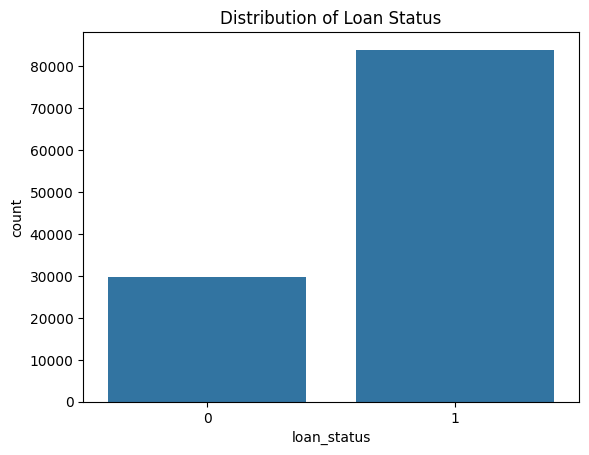

In [6]:
# Visualize target variable distribution
sns.countplot(x='loan_status', data=train_data)
plt.title('Distribution of Loan Status')
plt.show()

In [8]:
# Step 3: Data Cleaning and Preprocessing
# Handle missing values (impute or drop)
numeric_columns = train_data.select_dtypes(include=[np.number]).columns  # Numeric columns only
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].median())  # Impute numeric columns with median

# Handle categorical missing values (optional, depends on dataset)
categorical_columns = train_data.select_dtypes(include=['object']).columns  # Categorical columns only
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])  # Impute categorical columns with mode


In [9]:
# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col].astype(str))

In [10]:
# Step 4: Feature Selection
# Drop columns that may not add predictive power (like customer ID)
if 'customer_id' in train_data.columns:
    train_data.drop('customer_id', axis=1, inplace=True)

In [11]:
# Step 5: Train-Test Split
X = train_data.drop('loan_status', axis=1)  # Features
y = train_data['loan_status']  # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 6: Feature Scaling
# Drop datetime columns if any
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
X_train = X_train.drop(columns=datetime_columns)
X_val = X_val.drop(columns=datetime_columns)

In [14]:
# Select only numeric columns for scaling
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])

In [15]:
# Step 7: Model Training
# Using RandomForestClassifier as it often works well for classification tasks
rfc = RandomForestClassifier(random_state=42)

In [19]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [20]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, cv=5, n_iter=20, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [21]:
# Get the best estimator
best_rfc = random_search.best_estimator_

In [22]:
# Step 8: Model Evaluation
# Validate on the validation set
y_pred = best_rfc.predict(X_val)

In [23]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy Score:", accuracy_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.25      0.36      5917
           1       0.78      0.95      0.86     16824

    accuracy                           0.77     22741
   macro avg       0.71      0.60      0.61     22741
weighted avg       0.74      0.77      0.73     22741

Confusion Matrix:
 [[ 1483  4434]
 [  878 15946]]
Accuracy Score: 0.7664130864957566


In [51]:
#Step 9: Test Data Prediction
# Preprocess the test data similarly to train data
numeric_columns = test_data.select_dtypes(include=[np.number]).columns  # Numeric columns only
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].median())  # Impute numeric columns with median

In [52]:
# Handle categorical missing values
categorical_columns = test_data.select_dtypes(include=['object']).columns  # Categorical columns only
for col in categorical_columns:
    if test_data[col].isnull().all():  # If the entire column is NaN
        test_data[col] = test_data[col].fillna('Unknown')  # Fallback strategy
    else:
        mode_value = test_data[col].mode().iloc[0] if not test_data[col].mode().empty else 'Unknown'
        test_data[col] = test_data[col].fillna(mode_value)  # Impute categorical columns with mode or 'Unknown'

In [53]:
# Convert categorical variables to numeric using Label Encoding
for col in categorical_columns:
    if col in test_data.columns:
        test_data[col] = le.fit_transform(test_data[col].astype(str))

In [54]:
# Drop 'customer_id' column if exists
if 'customer_id' in test_data.columns:
    test_data.drop('customer_id', axis=1, inplace=True)

In [55]:
# If 'transaction_date' column is missing, add it to test_data with synthetic values
if 'transaction_date' not in test_data.columns:
    test_data['transaction_date'] = pd.to_datetime('2024-12-11')  # Placeholder date (can use current date as well)

In [58]:
# Drop datetime columns (including 'transaction_date') from test data
datetime_columns = test_data.select_dtypes(include=['datetime64']).columns
test_data = test_data.drop(columns=datetime_columns)  # Drop datetime columns like 'transaction_date'

In [59]:
# Ensure test_data has the same columns as X_train (features)
# 1. Remove any columns from test_data that are not in X_train
test_data = test_data[X_train.columns]  # This ensures that test_data has the same columns as X_train

In [60]:
# 2. If test_data has fewer columns than X_train, add the missing columns with NaN values
missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = np.nan  # Add missing columns with NaN values

In [61]:
# 3. If test_data has extra columns not in X_train, remove them
extra_cols = set(test_data.columns) - set(X_train.columns)
test_data = test_data.drop(columns=extra_cols)

In [62]:
# Reorder the columns in test_data to match the order of X_train
test_data = test_data[X_train.columns]

In [63]:
# Select only numeric columns for scaling
numeric_columns = test_data.select_dtypes(include=[np.number]).columns

In [64]:
# Apply scaling to numeric columns
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])  # Apply scaling

In [65]:
# Make predictions using the best random forest model
test_predictions = best_rfc.predict(test_data)